In [63]:
import numpy as np
import ROOT as rt
import matplotlib.pyplot as plt
from rootplot import root2matplotlib as rpm
%matplotlib inline

swap ={"left":"right", "right":"left", "center":"center"}

In [65]:
def lightsharing(p, a,b,c):
    out = np.ones(p.size)
    out[p<0] = p[p<0]*a+ c
    out[p>=0] = p[p>=0]*b+c
    return out
func = {}

#right
func["right"] = (lambda x:lightsharing(x,.32,.68,.16 ))
#left
func["left"] = (lambda x:func["right"](-x))
#center
func["center"] = (lambda x:1-func["right"](x)-func["right"](-x))

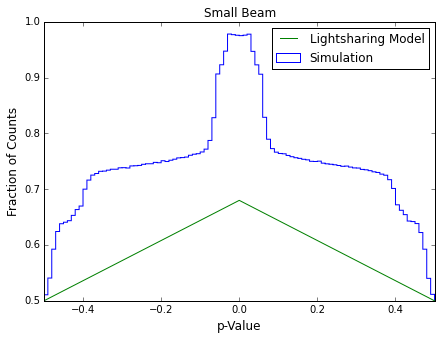

In [82]:
in_file = rt.TFile("data/collected_charge/x_0/plots/lightsharing/OutFile.root")
p = np.linspace(-.5,.5,51)
for name in [ "right","left","center"]:
    pass
    hist = in_file.Get(swap[name]+"_scaled")
    plt.close()
    plt.axes()
    hist = rpm.Hist(hist,label="Simulation") # Convert to Matplotlib

    hist.hist(histtype = "step")
    plt.plot(p,func[name](p), label="Lightsharing Model")
    
    plt.gcf().set_size_inches((7,5))
    plt.xlabel("p-Value", fontsize="large")
    plt.title("Small Beam")
    plt.ylabel("Fraction of Counts", fontsize="large")
    if name == "center":
        plt.ylim(0.5,1)
    plt.legend()
    plt.savefig("small_"+name+".pdf")


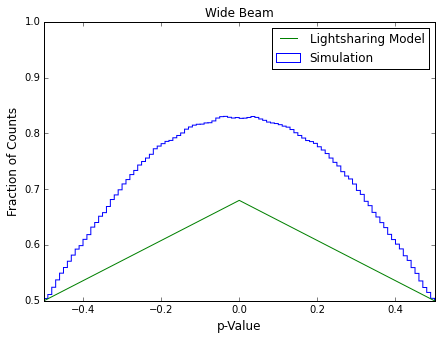

In [81]:
in_file = rt.TFile("data/collected_charge_wide/x_0/plots/lightsharing/OutFile.root")
p = np.linspace(-.5,.5,51)
for name in [ "right","left","center"]:
    pass
    hist = in_file.Get(swap[name]+"_scaled")
    plt.close()
    plt.axes()
    hist = rpm.Hist(hist,label="Simulation") # Convert to Matplotlib

    hist.hist(histtype = "step")
    plt.plot(p,func[name](p), label="Lightsharing Model")
    
    plt.gcf().set_size_inches((7,5))
    plt.xlabel("p-Value", fontsize="large")
    plt.ylabel("Fraction of Counts", fontsize="large")
    plt.title("Wide Beam")
    if name == "center":
        plt.ylim(0.5,1)
    plt.legend()
    plt.savefig("wide_"+name+".pdf")

